# **Sales Prediction Model Using Python**

# **Problem Statement :**

- Build a model which predicts sales based on the money spent on different platforms for marketing.

# **Introduction :**

Sales prediction is a vital aspect of business strategy that involves forecasting future sales based on historical data and various influencing factors. By accurately predicting sales, businesses can make informed decisions regarding inventory management, marketing strategies, and budget allocations, thereby enhancing overall efficiency and profitability.

In today’s competitive market, leveraging data-driven insights is no longer optional but a necessity. Factors such as advertising expenditure, target audience preferences, seasonal trends, and platform selection significantly impact sales performance. Data scientists play a crucial role in analyzing these variables using advanced machine learning techniques, enabling businesses to understand customer behavior and predict future demand with precision.

By utilizing Python’s capabilities, businesses can preprocess complex datasets, identify meaningful patterns, and create robust sales forecasting models. These insights empower organizations to optimize advertising strategies, allocate resources effectively, and ultimately maximize revenue potential.

This guide will walk you through the step-by-step process of predicting sales using machine learning in Python, starting from data collection and preprocessing to building, evaluating, and deploying a predictive model. Whether you are a data enthusiast or a professional seeking to refine your skills, this journey into sales prediction will equip you with the knowledge and tools needed to unlock valuable business insights.








In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing data
df=pd.read_csv('/content/advertising.csv.csv')

In [3]:
# Cheacking data
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Informative Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# Descriptive Summary
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## **Insights :**

#### **Dataset Structure :**

- The dataset contains 200 rows and 4 columns: TV, Radio, Newspaper, and Sales.

- All columns have non-null values, indicating no missing data.

#### **Statistical Summary :**

- The mean Sales value is approximately 15.13, with a standard deviation of 5.28.

- The TV variable has the highest average investment (~147.04), suggesting it is the primary advertising medium.

#### **Variability :**

- The maximum investment in Newspaper (114.0) is significantly higher than the mean (30.55), indicating possible outliers or sporadic high spending.


In [6]:
# numbers of rows and columns
df.shape

(200, 4)

In [7]:
# Cheacking for null values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


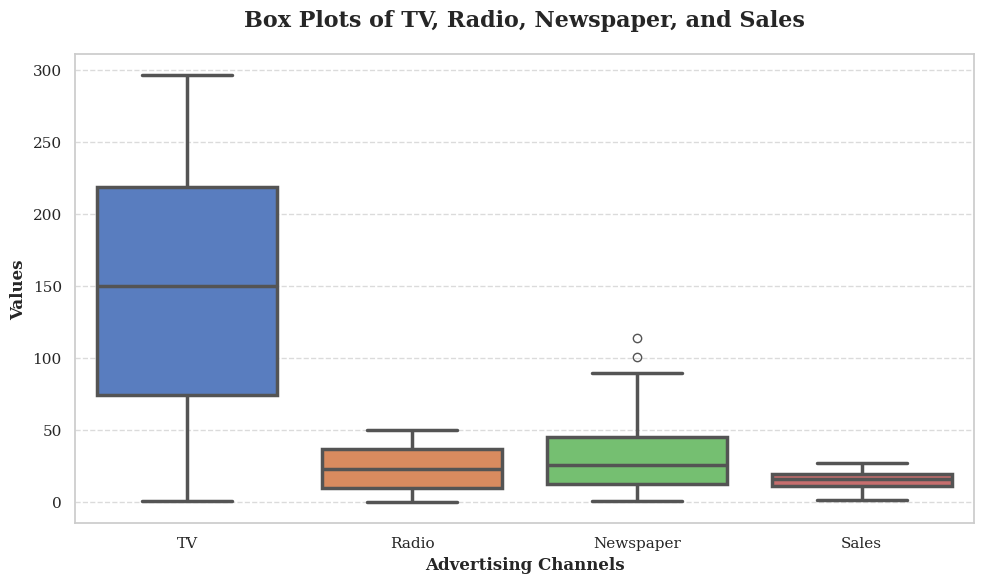

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional and aesthetic style
sns.set_theme(style="whitegrid", palette="muted", font="serif")

# Checking for outliers
plt.figure(figsize=(10, 6))  # Larger figure size for better visibility
boxplot = sns.boxplot(data=df[['TV', 'Radio', 'Newspaper', 'Sales']], linewidth=2.5)

# Add title and labels with enhanced formatting
boxplot.set_title('Box Plots of TV, Radio, Newspaper, and Sales', fontsize=16, fontweight='bold', pad=20)
boxplot.set_ylabel('Values', fontsize=12, fontweight='bold')
boxplot.set_xlabel('Advertising Channels', fontsize=12, fontweight='bold')

# Customize tick labels
boxplot.set_xticklabels(boxplot.get_xticklabels(), fontsize=11, fontweight='medium', rotation=0)

# Add subtle gridlines
boxplot.yaxis.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


### **Insights :**
- **There is only newspapers columns** and there is no oultiers in TV, Radio and Sales.

## **Data Preparing :**

In [9]:
# Calculate Q1, Q3, IQR for the 'Newspaper' column
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(f"Lower fence for Newspaper: {lower_fence}")
print(f"Upper fence for Newspaper: {upper_fence}")

Lower fence for Newspaper: -35.775000000000006
Upper fence for Newspaper: 93.625


In [10]:
# has Newspaper adversting cost should be alteast greater than zero . So filtering the data accordingly

lower_fence=0

df = df[(df['Newspaper'] > lower_fence) & (df['Newspaper'] <= upper_fence)]


In [11]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
df.shape

(198, 4)

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,15.100000
std,85.443221,14.862111,20.446303,5.271184
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,11.000000
50%,149.750000,22.400000,25.600000,16.000000
75%,218.475000,36.325000,44.050000,18.975000
max,293.600000,49.600000,89.400000,27.000000


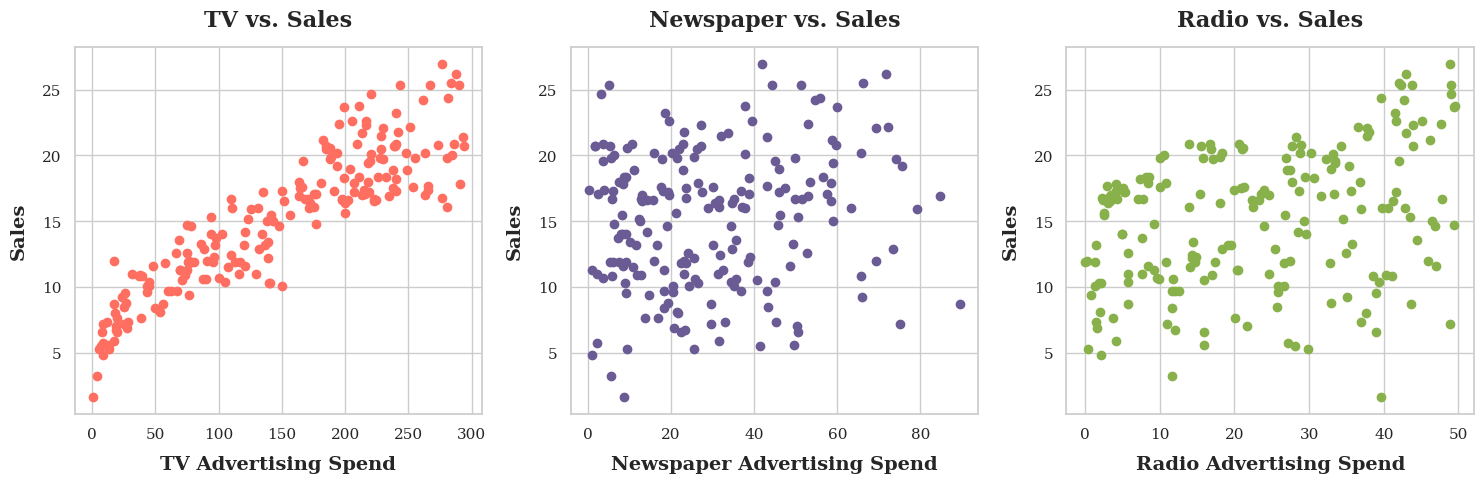

In [14]:
# Scatterplot Between TV, Radio, and Sales
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Custom color palette
scatter_colors = ["#FF6F61", "#6B5B95", "#88B04B"]

# Plot 'TV' vs 'Sales'
axes[0].scatter(df['TV'], df['Sales'], color=scatter_colors[0])
axes[0].set_xlabel('TV Advertising Spend', fontsize=14, fontweight='bold', labelpad=10)
axes[0].set_ylabel('Sales', fontsize=14, fontweight='bold', labelpad=10)
axes[0].set_title('TV vs. Sales', fontsize=16, fontweight='bold', pad=15)

# Plot 'Newspaper' vs 'Sales'
axes[1].scatter(df['Newspaper'], df['Sales'], color=scatter_colors[1])
axes[1].set_xlabel('Newspaper Advertising Spend', fontsize=14, fontweight='bold', labelpad=10)
axes[1].set_ylabel('Sales', fontsize=14, fontweight='bold', labelpad=10)
axes[1].set_title('Newspaper vs. Sales', fontsize=16, fontweight='bold', pad=15)

# Plot 'Radio' vs 'Sales'
axes[2].scatter(df['Radio'], df['Sales'], color=scatter_colors[2])
axes[2].set_xlabel('Radio Advertising Spend', fontsize=14, fontweight='bold', labelpad=10)
axes[2].set_ylabel('Sales', fontsize=14, fontweight='bold', labelpad=10)
axes[2].set_title('Radio vs. Sales', fontsize=16, fontweight='bold', pad=15)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the plots
plt.show()


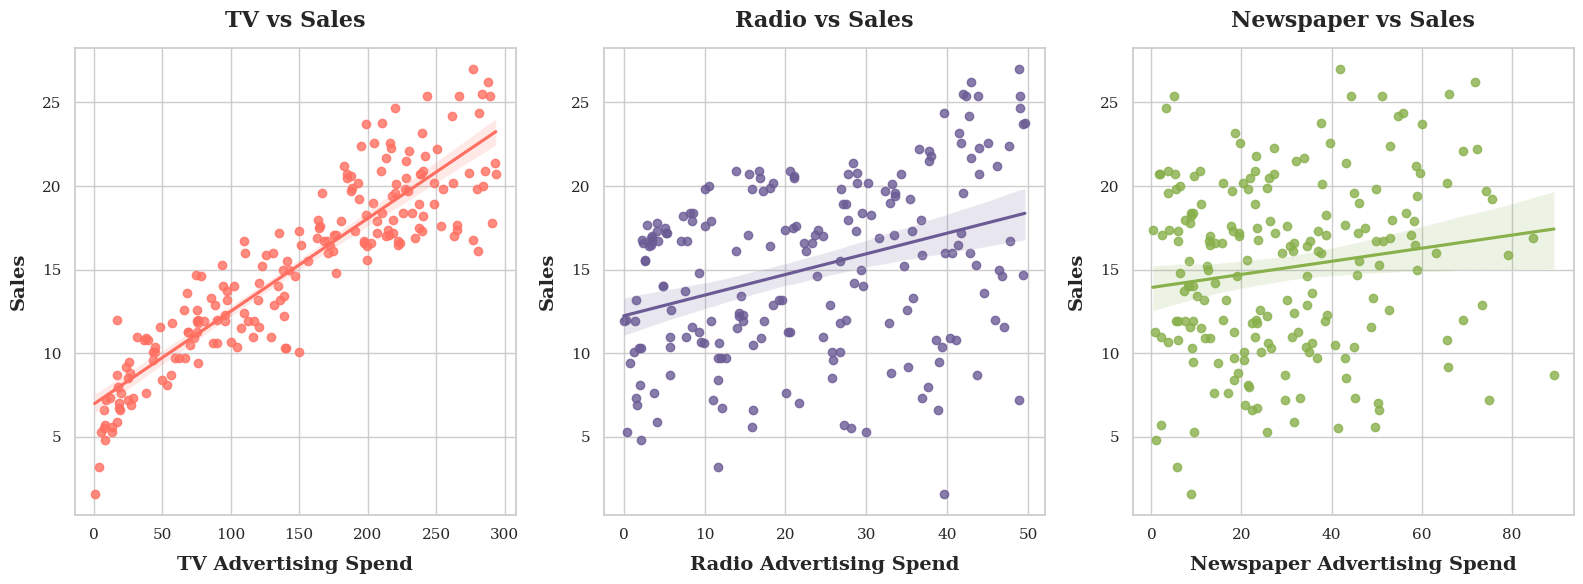

In [15]:
# Regression plot Between TV, Radio, and Sales
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

# Custom color palette for regression lines
regression_colors = ["#FF6F61", "#6B5B95", "#88B04B"]

# Regression plot 'TV' vs 'Sales'
sns.regplot(ax=axes[0], x='TV', y='Sales', data=df, color=regression_colors[0])
axes[0].set_title('TV vs Sales', fontsize=16, fontweight='bold', pad=15)
axes[0].set_xlabel('TV Advertising Spend', fontsize=14, fontweight='bold', labelpad=10)
axes[0].set_ylabel('Sales', fontsize=14, fontweight='bold', labelpad=10)

# Regression plot 'Radio' vs 'Sales'
sns.regplot(ax=axes[1], x='Radio', y='Sales', data=df, color=regression_colors[1])
axes[1].set_title('Radio vs Sales', fontsize=16, fontweight='bold', pad=15)
axes[1].set_xlabel('Radio Advertising Spend', fontsize=14, fontweight='bold', labelpad=10)
axes[1].set_ylabel('Sales', fontsize=14, fontweight='bold', labelpad=10)

# Regression plot 'Newspaper' vs 'Sales'
sns.regplot(ax=axes[2], x='Newspaper', y='Sales', data=df, color=regression_colors[2])
axes[2].set_title('Newspaper vs Sales', fontsize=16, fontweight='bold', pad=15)
axes[2].set_xlabel('Newspaper Advertising Spend', fontsize=14, fontweight='bold', labelpad=10)
axes[2].set_ylabel('Sales', fontsize=14, fontweight='bold', labelpad=10)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the plots
plt.show()


## **Insights :**

- There is a Tv and Sales scatterplot as there is positive realtionship and good predictive model can be built.

- As per scatterplot, Radio vs Sales has moderate postive realtionship between them.

- There is weak relationship between Newspaper and Sales.

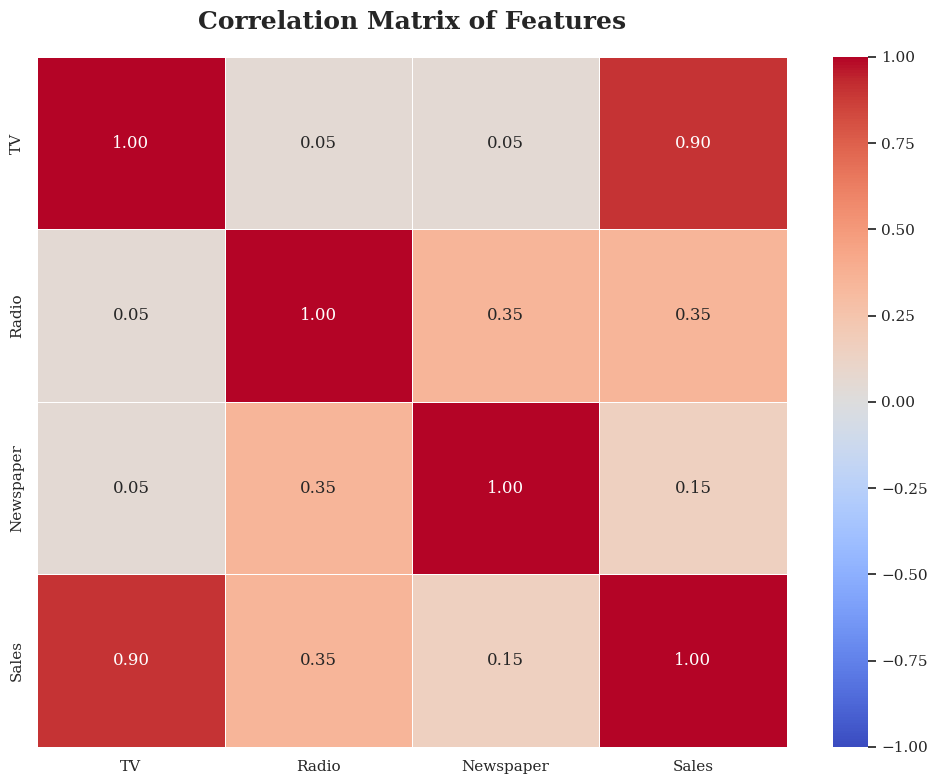

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation plot for each feature
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='white', cbar=True, vmin=-1, vmax=1)

# Add title for better clarity
plt.title('Correlation Matrix of Features', fontsize=18, fontweight='bold', pad=20)

# Display the plot
plt.tight_layout()
plt.show()


# **Insights :**

### **Correlation Between Advertising Channels and Sales :**

- TV advertising has the highest positive correlation with Sales (approximately 0.9), suggesting that TV spending significantly impacts sales.

- Radio advertising also shows a moderate positive correlation with Sales (~0.35), but less than TV.

### **Low Influence of Newspaper Advertising :**

- Newspaper advertising has a very weak correlation with Sales, implying it has little to no direct impact on driving sales.


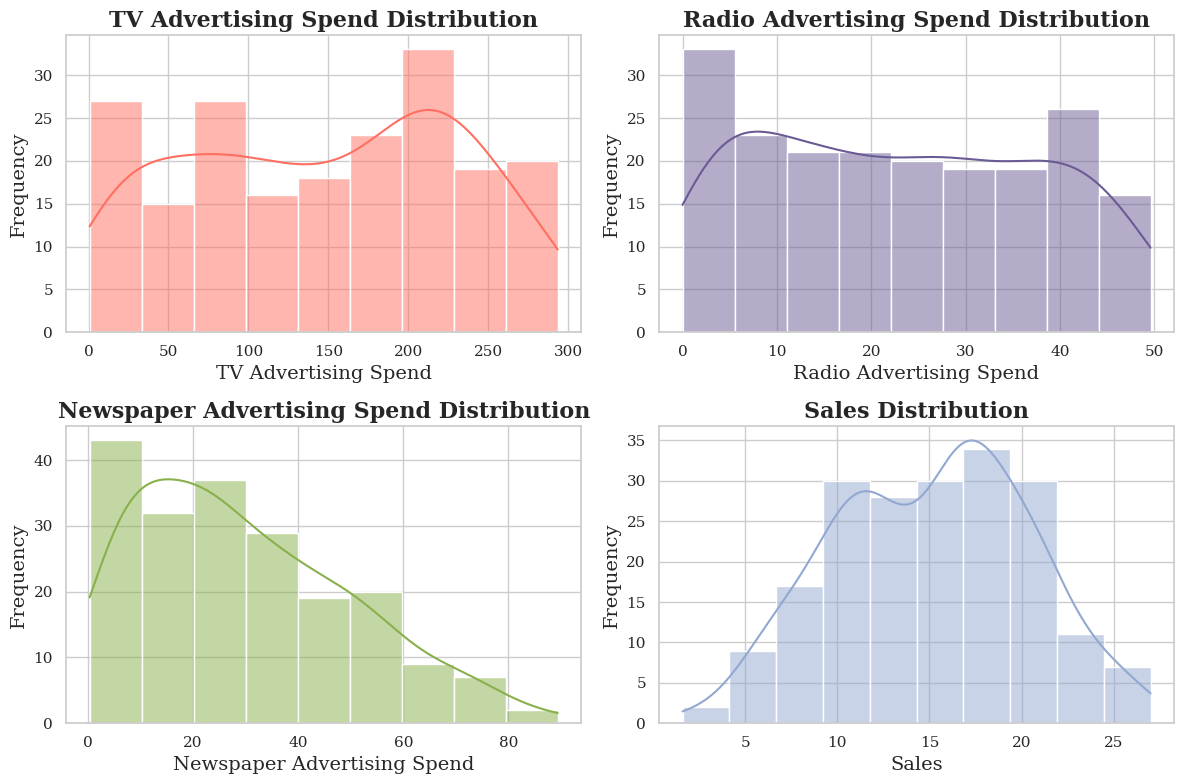

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a refined theme
sns.set_theme(style="whitegrid", font="serif")

# Distribution plots for TV, Radio, Newspaper, and Sales
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# TV Advertising Spend Distribution
sns.histplot(df['TV'], kde=True, ax=axes[0, 0], color='#FF6F61')
axes[0, 0].set_title('TV Advertising Spend Distribution', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('TV Advertising Spend', fontsize=14, fontweight='medium')
axes[0, 0].set_ylabel('Frequency', fontsize=14, fontweight='medium')

# Radio Advertising Spend Distribution
sns.histplot(df['Radio'], kde=True, ax=axes[0, 1], color='#6B5B95')
axes[0, 1].set_title('Radio Advertising Spend Distribution', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Radio Advertising Spend', fontsize=14, fontweight='medium')
axes[0, 1].set_ylabel('Frequency', fontsize=14, fontweight='medium')

# Newspaper Advertising Spend Distribution
sns.histplot(df['Newspaper'], kde=True, ax=axes[1, 0], color='#88B04B')
axes[1, 0].set_title('Newspaper Advertising Spend Distribution', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('Newspaper Advertising Spend', fontsize=14, fontweight='medium')
axes[1, 0].set_ylabel('Frequency', fontsize=14, fontweight='medium')

# Sales Distribution
sns.histplot(df['Sales'], kde=True, ax=axes[1, 1], color='#92A8D1')
axes[1, 1].set_title('Sales Distribution', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Sales', fontsize=14, fontweight='medium')
axes[1, 1].set_ylabel('Frequency', fontsize=14, fontweight='medium')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


## **Insights :**
#### **Distribution Insights :**

- TV advertising expenditure is broadly distributed across all ranges, with a higher concentration around the mid-range (150-250).

- Radio and Newspaper expenditures are more concentrated towards the lower end, suggesting limited spending in these channels.


#### **Sales Distribution :**

- Sales distribution is relatively normal, with a peak around the mean sales value (~$15).
- There are no significant outliers, indicating that the dataset is well-suited for modeling.







# **Model Building :**

- **There is a  linear relationship between the columns,we will use Linear Regression.**

In [18]:
# Feature selection and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X[['TV', 'Radio', 'Newspaper']], df['Sales'], test_size=0.2, random_state=42)
# Changed X['TV'] to X[['TV']] to create a DataFrame with a single column

print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (158, 3)
X_test shape : (40, 3)
y_train shape : (158,)
y_test shape : (40,)


In [20]:
# Cheacking train data
X_train.head()

,TV,Radio,Newspaper
139,184.9,43.9,1.7
5,8.7,48.9,75.0
67,139.3,14.5,10.2
140,73.4,17.0,12.9
106,25.0,11.0,29.7


In [21]:
# Model Building
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [22]:
# Predicitng Values

res=model.predict(X_test)
print(res.shape)

(40,)


In [23]:
# Priting predicted Values
print(res)

[ 8.82481623 13.77055468 24.22481723 11.10056512  9.32009201 21.48456053
 20.15850056 12.76167515 15.12881886 21.08287367 15.98934888 20.38088326
  8.16535464 14.03642672  8.9375406  10.73054602  9.35201578 15.82574293
  9.79573284 11.63821168 12.60519985 17.21866213 23.44516693  7.02979947
 18.7214195  20.9597909   8.20661353 18.25399281  7.45331361 14.85839901
 18.74710884 14.11078068  9.01994517 13.07559033 19.30878714 17.89362267
 16.88640389 14.52324791 19.60537819 17.74576003]


In [24]:
# Test Values for Predicted values
print(y_test)

66     11.0
116    12.2
17     24.4
143    10.4
158     7.3
128    24.7
142    20.1
31     11.9
19     14.6
169    20.0
160    16.4
15     22.4
56      5.5
57     13.2
117     9.4
46     10.6
126     6.6
9      15.6
149    10.1
86     12.0
115    12.6
163    18.0
61     24.2
189     6.7
74     17.0
69     22.3
121     7.0
165    16.9
119     6.6
177    16.7
70     18.3
77     14.2
127    11.9
83     13.6
25     17.0
193    19.6
97     20.5
173    16.7
20     18.0
152    16.6
Name: Sales, dtype: float64


In [25]:
# model Coefficent
model.coef_

# Sales= 4.7141 + 0.0545⋅Feature_1 + 0.1009⋅Feature_2 + 0.0043⋅Feature_3

array([0.05395925, 0.10101512, 0.00746937])

In [26]:
# model Intercept
model.intercept_

4.623695319484101

In [27]:
# Checking Accuracy score for model
print(model.score(X_test,y_test)*100)

91.30003152798272


In [28]:
y_test.head()

,Sales
66,11.0
116,12.2
17,24.4
143,10.4
158,7.3


In [29]:
# Feature selection and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Note the change: X is passed directly to train_test_split

print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (158, 3)
X_test shape : (40, 3)
y_train shape : (158,)
y_test shape : (40,)


In [30]:
X_test.head()

,TV,Radio,Newspaper
66,31.5,24.6,2.2
116,139.2,14.3,25.6
17,281.4,39.6,55.8
143,104.6,5.7,34.4
158,11.7,36.9,45.2


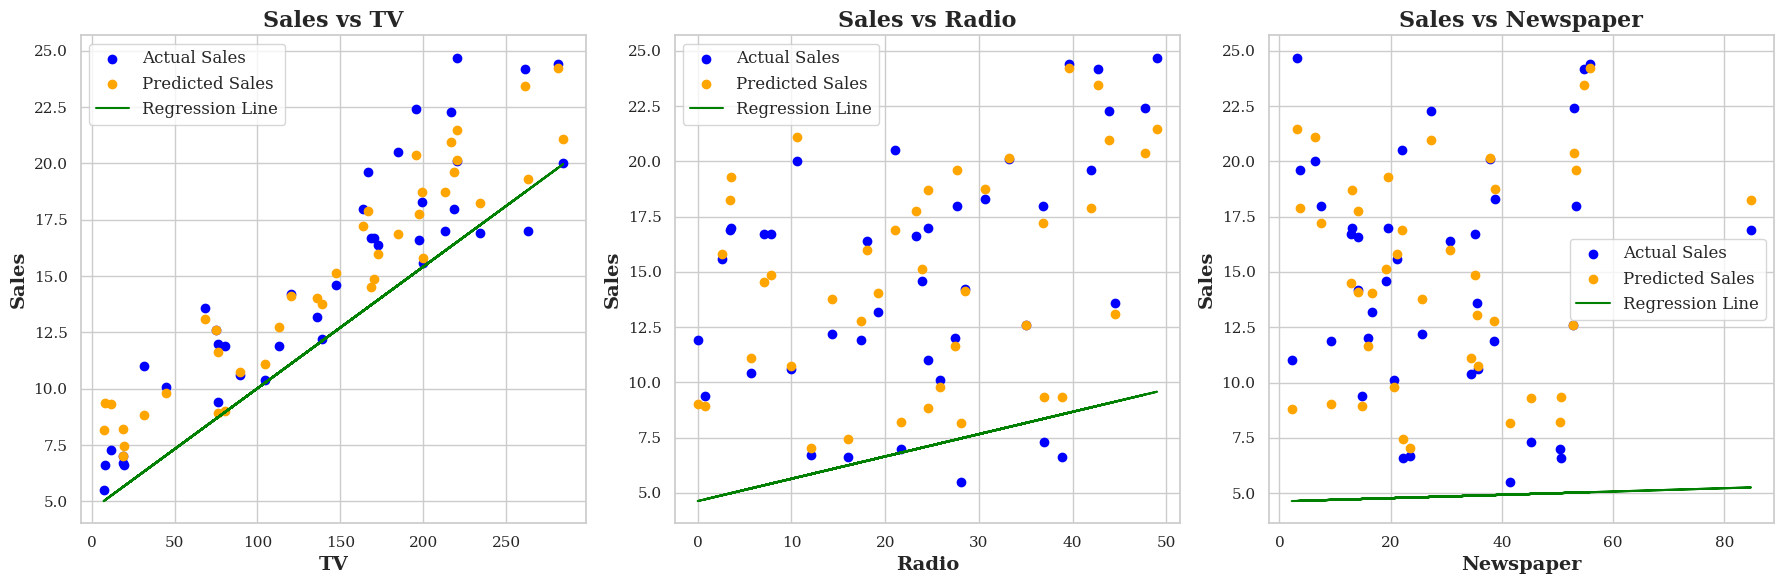

In [31]:
import matplotlib.pyplot as plt

# Function to plot individual features against sales
def plot_feature_vs_sales(feature_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[feature_name], y_test, color='blue', label='Actual Sales')
    plt.scatter(X_test[feature_name], y_pred, color='orange', label='Predicted Sales')

    # Regression line
    coef_index = X_train.columns.get_loc(feature_name)
    plt.plot(X_test[feature_name], model.intercept_ + model.coef_[coef_index] * X_test[feature_name], color='green', label='Regression Line')

    plt.xlabel(feature_name, fontsize=14, fontweight='bold')
    plt.ylabel('Sales', fontsize=14, fontweight='bold')
    plt.title(f'Sales vs {feature_name}', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.show()


# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjust figsize as needed

# Plot for each feature in a subplot
for i, feature in enumerate(['TV', 'Radio', 'Newspaper']):
    axes[i].scatter(X_test[feature], y_test, color='blue', label='Actual Sales')
    axes[i].scatter(X_test[feature], y_pred, color='orange', label='Predicted Sales')

    # Regression line
    coef_index = X_train.columns.get_loc(feature)
    axes[i].plot(X_test[feature], model.intercept_ + model.coef_[coef_index] * X_test[feature], color='green', label='Regression Line')

    axes[i].set_xlabel(feature, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Sales', fontsize=14, fontweight='bold')
    axes[i].set_title(f'Sales vs {feature}', fontsize=16, fontweight='bold')
    axes[i].legend(fontsize=12)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


## **Insights :**

#### **Sales vs. TV :**

- A **clear positive correlation** is observed between TV advertising and Sales.

- Predicted values align closely with the actual values, **indicating good model performance for TV**.

#### **Sales vs. Radio :**

- A **moderate positive relationship** exists, with more scatter compared to TV.

- The predicted values are **relatively close but show higher variance than TV.**

#### **Sales vs. Newspaper :**

- The **correlation appears weak**, as the scatter is widespread, and the regression line is nearly flat.

- Newspaper advertising **seems to have minimal impact on Sales**.


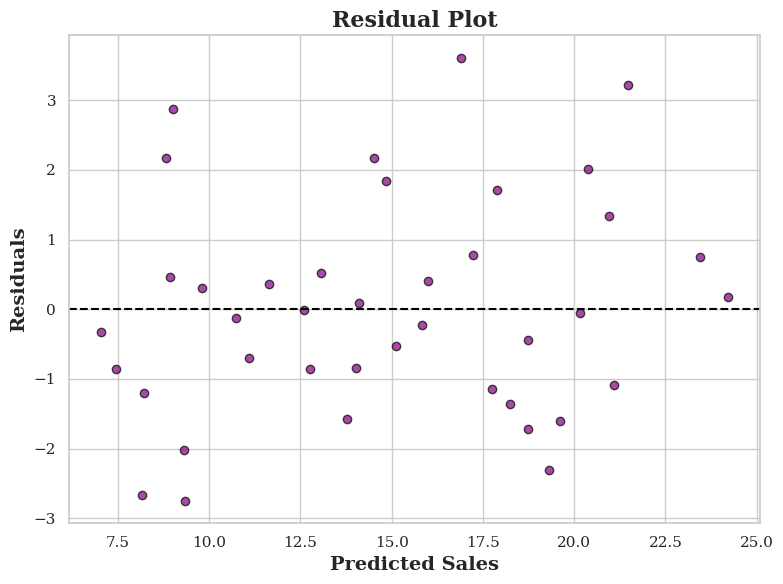

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.7, edgecolors='black')
plt.axhline(0, linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Predicted Sales', fontsize=14, fontweight='bold')
plt.ylabel('Residuals', fontsize=14, fontweight='bold')
plt.title('Residual Plot', fontsize=16, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()


## **Insights :**

#### **Residual Analysis :**

- The residuals are scattered randomly around the zero line, indicating no clear pattern and a reasonable fit.

- However, there are a few points with larger residuals, suggesting the model may not capture some outliers well.


#### **Model Assumptions :**

- The randomness in the residuals supports the assumption of homoscedasticity (constant variance of errors).

- Any systematic pattern in residuals would indicate a need for model improvement or transformation of features.


In [33]:
# Model Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {round(mse,2)}")
print(f"R-squared (R2): {round(r2,2)}")
print(f"Accuracy: {model.score(X_test, y_test) * 100:.2f}%")

Mean Squared Error (MSE): 2.42
R-squared (R2): 0.91
Accuracy: 91.30%


## **Final Recommendation :**  


#### **1. Increase Investment in TV Advertising**  
- Given the **strong positive correlation with sales (~0.9)**, reallocating resources to TV advertising is expected to yield the highest returns.  
- Focus on maintaining or increasing the **mid-range spending** on TV ($150-$250), as this range appears to drive consistent sales growth effectively.  



#### **2. Strategically Enhance Radio Advertising**  
- Although Radio shows a weaker correlation with sales compared to TV, it still has a **moderate positive impact (~0.35)**.  
- Test **incremental increases in Radio spending** to explore additional sales opportunities.  
- Leverage targeted campaigns to amplify the effectiveness of Radio advertising, especially when integrated with TV campaigns.  



#### **3. Reduce or Reevaluate Newspaper Advertising**  
- With its **negligible correlation (~0.05)** to sales, Newspaper advertising offers minimal value in driving revenue.  
- It is recommended to **significantly reduce or reallocate Newspaper budgets** to higher-impact channels like TV and Radio.  


#### **4. Run Pilot Campaigns for Optimization**  
- Conduct **pilot campaigns** to test the effectiveness of reallocating funds from Newspaper to TV and Radio.  
- Use these campaigns to validate the potential for improved ROI while minimizing risks associated with major budget shifts.  



#### **5. Focus on Integrated Campaigns**  
- Adopt a **combined approach** by leveraging the strengths of both TV and Radio advertising.  
- For example, use Radio ads to **complement TV campaigns**, reinforcing key messages and maximizing reach. This synergy can amplify the overall impact of your advertising strategy.  



#### **6. Explore Data-Driven Enhancements**  
- Implement **predictive models** to simulate the impact of different budget allocations and optimize advertising spend across channels.  
- Utilize insights from these models to deploy budgets with maximum efficiency and effectiveness.  


#### **7. Consider External Factors**  
- Assess **market trends**, **audience preferences**, and **regional differences** to fine-tune advertising strategies.  
- These external insights will help uncover untapped opportunities and adapt strategies to align with evolving market dynamics.  

## **Conclusion :**  

The analysis highlights that TV advertising is the most impactful channel, with a strong positive correlation to sales (approximately 0.9), making it the top priority for investment. Radio advertising also shows potential with a moderate correlation (approximately 0.35) and should be strategically enhanced. Conversely, Newspaper advertising demonstrates minimal impact on sales (approximately 0.05 correlation) and should be significantly reduced or reallocated.  

By reallocating budgets from Newspaper to TV and Radio, running pilot campaigns, and adopting an integrated approach, the company can maximize ROI and sales performance. Leveraging predictive models and market insights will further refine strategies, ensuring sustained growth and efficiency in future advertising efforts.